In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv('tesla.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Nov 20, 2023",234.04,237.10,231.02,235.60,235.60,"115,325,704"
1,1,"Nov 17, 2023",232.00,237.39,226.54,234.30,234.30,"142,532,800"
2,2,"Nov 16, 2023",239.49,240.88,230.96,233.59,233.59,"136,816,800"
3,3,"Nov 15, 2023",239.29,246.70,236.45,242.84,242.84,"150,354,000"
4,4,"Nov 14, 2023",235.03,238.14,230.72,237.41,237.41,"149,771,600"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   Date         100 non-null    object 
 2   Open         100 non-null    float64
 3   High         100 non-null    float64
 4   Low          100 non-null    float64
 5   Close*       100 non-null    float64
 6   Adj Close**  100 non-null    float64
 7   Volume       100 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 6.4+ KB


In [13]:
data = df['Close*'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Convert 'Volume' to numeric type
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Create sequences
sequence_length = 10
sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length:i+sequence_length+1]
    sequences.append(seq)
    target.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
target = np.array(target)

In [14]:
split_ratio = 0.8
split = int(split_ratio * len(sequences))

X_train = sequences[:split]
y_train = target[:split]
X_test = sequences[split:]
y_test = target[split:]

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
3/3 [==============================] - 2s 10ms/step - loss: 0.3319
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3035
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2790
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2577
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2387
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2206
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2019
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1831
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1628
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1399
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1162
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0909
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0

In [17]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 311ms/step


In [18]:
predictions = scaler.inverse_transform(predictions)
y_test_reshaped = y_test.reshape(-1, 1)
y_test_original = scaler.inverse_transform(y_test_reshaped)


In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 150.37779794575488


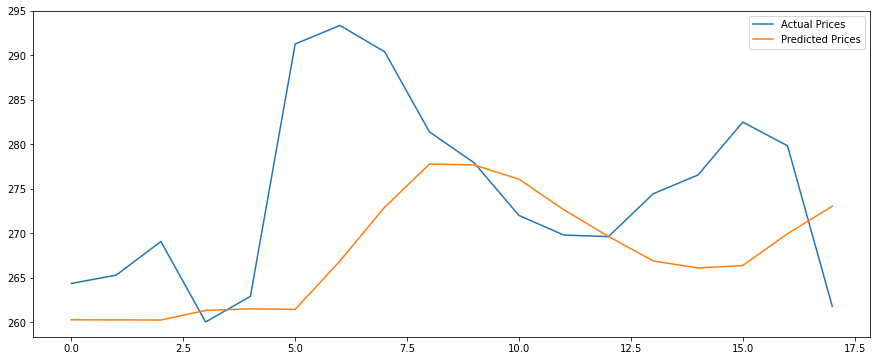

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()